# Notebook to Calculate RAV

In [1]:
import os
import shutil
import zipfile
import tarfile
import urllib
import requests
from pathlib import Path
from tqdm import tqdm
import h5py as h5

In [2]:
import numpy as np
import awkward as ak
import uproot
import vector
vector.register_awkward()

In [3]:
import matplotlib.pyplot as plt

In [4]:
import torch

/Users/billyli/miniforge_x86_new/envs/weaver/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
root_dir = Path("/Users/billyli/scope/JetClass/minimal")
list(root_dir.glob('*.root'))

[PosixPath('/Users/billyli/scope/JetClass/minimal/HToCC_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/WToQQ_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/ZToQQ_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToBB_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToGG_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToWW2Q1L_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/TTBarLep_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/TTBar_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/ZJetsToNuNu_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToWW4Q_120.root')]

In [6]:
f = list(root_dir.glob('*.root'))[0]
f.name.split('_')

['HToCC', '120.root']

In [7]:
example_file_path = "/Users/billyli/scope/JetClass/minimal/HtoBB_120.root"

In [9]:
# data fraction for each file:
data_fraction = 3e-2

## Get Jet Mass from Root Files

In [10]:
def feature_to_numpy(tree, feature):
    return tree[feature].arrays().to_numpy().astype(float)

In [11]:
jet_sdmass = {}
for f in root_dir.glob('*.root'):
    process = f.name.split('_')[0]
    tree = uproot.open(f)['tree']

    n_entries = tree.num_entries
    n_keep = int(n_entries * data_fraction)

    jet_sdmass[process] = tree["jet_sdmass"].array(
        entry_stop=n_keep,  # only read first fraction
        library="np"
    ).astype("double")
print(list(tree.keys()))

['part_px', 'part_py', 'part_pz', 'part_energy', 'part_deta', 'part_dphi', 'part_d0val', 'part_d0err', 'part_dzval', 'part_dzerr', 'part_charge', 'part_isChargedHadron', 'part_isNeutralHadron', 'part_isPhoton', 'part_isElectron', 'part_isMuon', 'label_QCD', 'label_Hbb', 'label_Hcc', 'label_Hgg', 'label_H4q', 'label_Hqql', 'label_Zqq', 'label_Wqq', 'label_Tbqq', 'label_Tbl', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_energy', 'jet_nparticles', 'jet_sdmass', 'jet_tau1', 'jet_tau2', 'jet_tau3', 'jet_tau4', 'aux_genpart_eta', 'aux_genpart_phi', 'aux_genpart_pid', 'aux_genpart_pt', 'aux_truth_match']


In [12]:
jet_sdmass

{'HToCC': array([115.258255  , 111.84100342, 125.46985626, ..., 109.96083832,
        120.78805542, 122.42395782]),
 'WToQQ': array([ 72.61198425,  89.07801056,  76.53503418, ..., 217.75540161,
          6.34987545,  95.31343842]),
 'ZToQQ': array([ 84.99334717,  85.89722443,  80.36242676, ...,  95.26013947,
        113.26947021,  76.77012634]),
 'HToBB': array([236.60557556, 244.01182556, 113.34453583, ..., 129.32678223,
          8.0081501 ,  12.1936636 ]),
 'HToGG': array([122.22318268, 118.07779694, 120.23336029, ..., 111.56098938,
         52.5796814 , 132.38490295]),
 'HToWW2Q1L': array([5.11340215e-04, 3.89420967e+01, 9.82005386e+01, ...,
        1.07059908e+01, 9.87117615e+01, 9.27664642e+01]),
 'TTBarLep': array([102.27770996,  74.19477081, 113.57976532, ..., 106.21901703,
        123.75213623, 136.96044922]),
 'TTBar': array([149.57839966,  80.48643494, 171.76864624, ..., 158.036026  ,
        198.85177612, 162.58100891]),
 'ZJetsToNuNu': array([  4.84817028,   7.31240273,  5

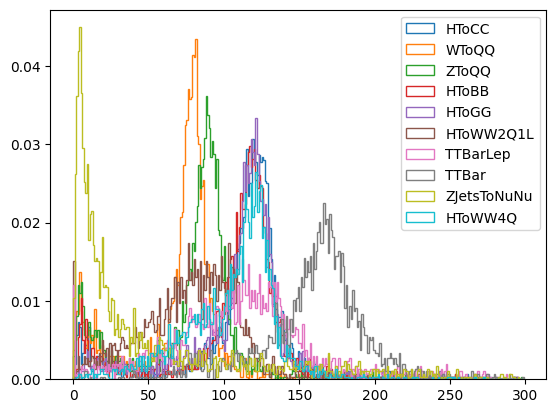

In [13]:
for k, v in jet_sdmass.items():
    plt.hist(v, label=k, bins=np.arange(0, 300, 1), density=True, histtype='step')
plt.legend()

(array([0.00033512, 0.00033512, 0.00033512, 0.        , 0.00067024,
        0.        , 0.        , 0.00100536, 0.00100536, 0.00033512,
        0.        , 0.00033512, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.00033512, 0.        ,
        0.00033512, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00033512, 0.        , 0.00033512, 0.00033512, 0.        ,
        0.        , 0.        , 0.00033512, 0.00033512, 0.00033512,
        0.00100536, 0.00067024, 0.00033512, 0.        , 0.00033512,
        0.00033512, 0.00033512, 0.        , 0.00033512, 0.        ,
        0.        , 0.00067024, 0.        , 0.00033512, 0.        ,
        0.00033512, 0.00033512, 0.00033512, 0.        , 0.00067024,
        0.        , 0.00033512, 0.00100536, 0.00100536, 0.00067024,
        0.00067024, 0.0016756 , 0.00067024, 0.00033512, 0.00100536,
        0.00134048, 0.00033512, 0.00100536, 0.00

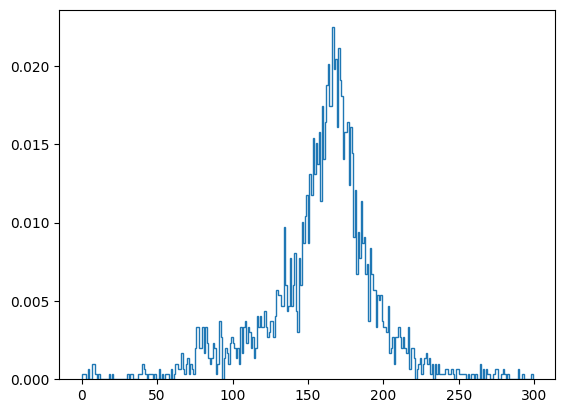

In [14]:
plt.hist(jet_sdmass['TTBar'], label='TTBar', bins=np.arange(0, 300, 1), density=True, histtype='step')

In [15]:
jet_sdmass.keys()

dict_keys(['HToCC', 'WToQQ', 'ZToQQ', 'HToBB', 'HToGG', 'HToWW2Q1L', 'TTBarLep', 'TTBar', 'ZJetsToNuNu', 'HToWW4Q'])

In [16]:
len(jet_sdmass['ZJetsToNuNu'])

3000

## Load the last class token

In [17]:
file = h5.File('/Users/billyli/scope/weaver-core/frac_3e-2.h5', 'r')

In [18]:
X = np.array(file['hidden_10'][:]).astype('float').squeeze(1)
print(X.shape, X.mean(axis=1), X.std(axis=1), X.dtype)

(30000, 128) [2.33712868 0.3182264  0.17937937 ... 1.17286085 1.1517988  0.15800945] [19.7748777  15.53458895 15.71584237 ... 17.54021022 18.4575237
 16.93592525] float64


## Linear Regression to get the coefficient vector

In [19]:
jet_sdmass_all_list = list(jet_sdmass.values())
jet_sdmass_all_list = [x[..., np.newaxis] for x in jet_sdmass_all_list]
jet_sdmass_all = np.concatenate(jet_sdmass_all_list, axis=0)
y_tensor = torch.tensor(jet_sdmass_all)

In [20]:
X_tensor = torch.tensor(X)
# X_tensor = torch.cat([X_tensor, torch.ones(X_tensor.size(0), 1)], dim=1)

In [21]:
print(y_tensor.dtype, X_tensor.dtype)

torch.float64 torch.float64


In [22]:
w_tensor = torch.linalg.pinv(X_tensor.T @ X_tensor) @ (X_tensor.T @ y_tensor)
noramlized_w = w_tensor / torch.norm(w_tensor)

In [23]:
noramlized_w

tensor([[-0.0760],
        [ 0.2443],
        [ 0.0092],
        [ 0.0455],
        [-0.0352],
        [-0.2395],
        [-0.0104],
        [-0.0754],
        [-0.0624],
        [ 0.0831],
        [-0.0270],
        [ 0.0511],
        [-0.0311],
        [-0.0787],
        [ 0.0953],
        [ 0.0189],
        [-0.0089],
        [-0.0561],
        [-0.0081],
        [ 0.0035],
        [-0.0060],
        [-0.0526],
        [ 0.0869],
        [-0.2825],
        [-0.0077],
        [-0.0093],
        [-0.1556],
        [ 0.0101],
        [ 0.0223],
        [ 0.2409],
        [-0.0415],
        [-0.0264],
        [-0.1774],
        [ 0.0788],
        [-0.0142],
        [-0.2067],
        [ 0.1013],
        [ 0.0051],
        [-0.0197],
        [ 0.0520],
        [-0.0409],
        [-0.0096],
        [ 0.0237],
        [ 0.0472],
        [-0.1179],
        [-0.0008],
        [-0.0608],
        [ 0.0437],
        [-0.0444],
        [-0.2686],
        [ 0.0987],
        [ 0.0063],
        [-0.

/Users/billyli/miniforge_x86_new/envs/weaver/lib/python3.7/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


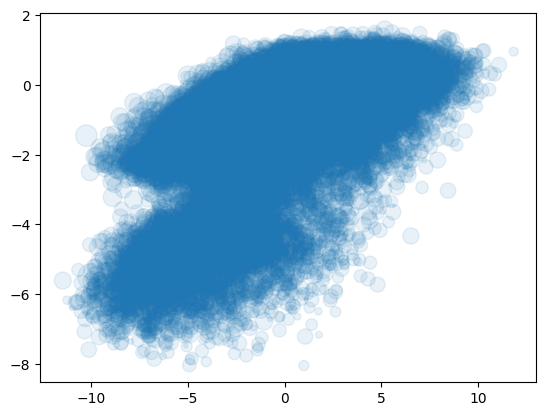

In [24]:
plt.scatter(X[:, 0], X[:, 1], s=y_tensor, alpha=0.1)
# def func(x, w):
#     return x * w[0] / w[1]
# plt.scatter(X[:, 0], func(X[:, 0], w_tensor.numpy()), color='red')

In [25]:
len(jet_sdmass_all_list)

10

In [26]:
with h5.File("rav_sdmass_frac_3e-2_no_bias.h5", 'w') as f:
    f.create_dataset('RAV_jet_sdmass', data=noramlized_w.cpu().numpy())

In [27]:
str(data_fraction)

'0.03'

In [32]:
vec1 = h5.File("rav_sdmass_frac_3e-3_no_bias.h5", 'r')['RAV_jet_sdmass'][:]
vec2 = h5.File("rav_sdmass_frac_3e-2_no_bias.h5", 'r')['RAV_jet_sdmass'][:]

In [33]:
(vec1*vec1).sum()

0.9999999999999991

In [34]:
(vec2*vec2).sum()

0.9999999999999999

In [35]:
(vec1*vec2).sum()

0.7351814178801832

In [36]:
vec1.shape

(128, 1)